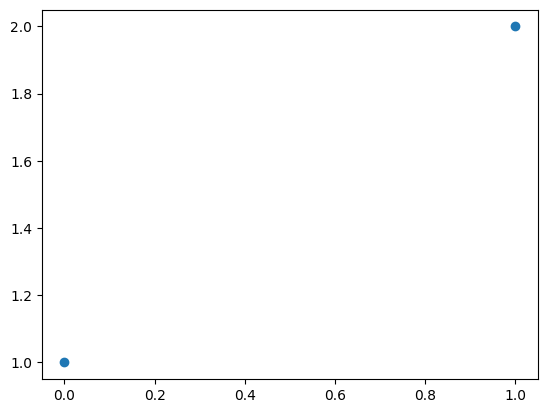

In [11]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_nn
import seis_test
plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [120]:
importlib.reload(kgs)
data=kgs.load_all_train_data(validation_only=True)
len(data)

5000

In [121]:
importlib.reload(seis_nn)
model = seis_nn.make_default_pretrained()

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed1_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed2_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
n_models: 2


In [ ]:
model.batch_size=200
data_out = model.infer(data)

  0%|                                                                                           | 0/25 [00:00<?, ?it/s]

In [114]:
print([d.seismogram.ind for d in data_out])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


0 CurveFault_A 8.363695641342474 0.0 -7.0


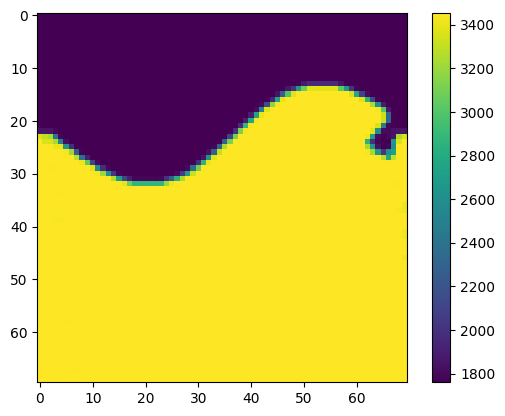

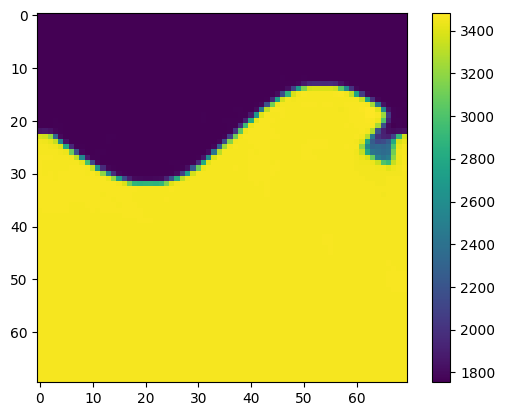

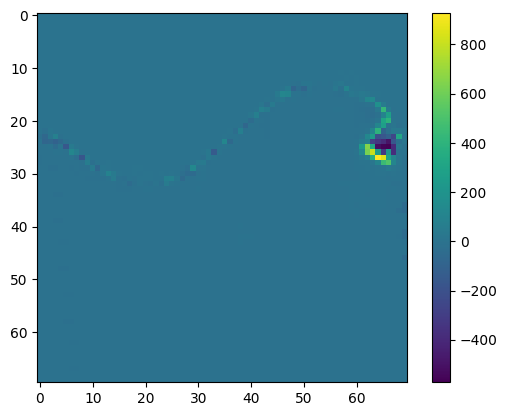

500 CurveFault_A 4.093418168048469 0.0 -1.0


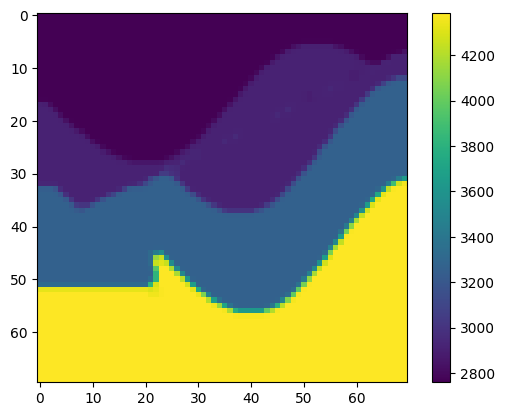

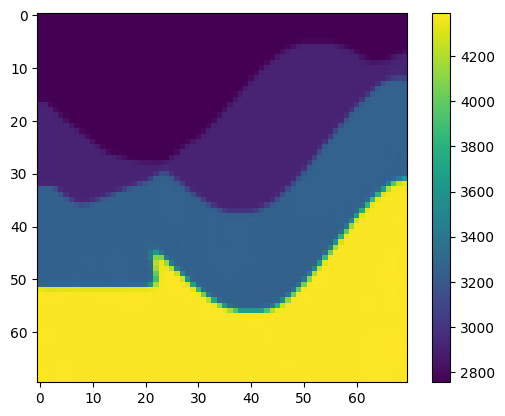

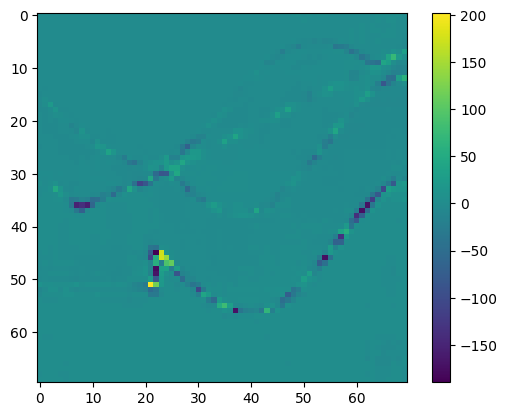

1000 CurveFault_B 74.01816326530613 2.0 -15.0


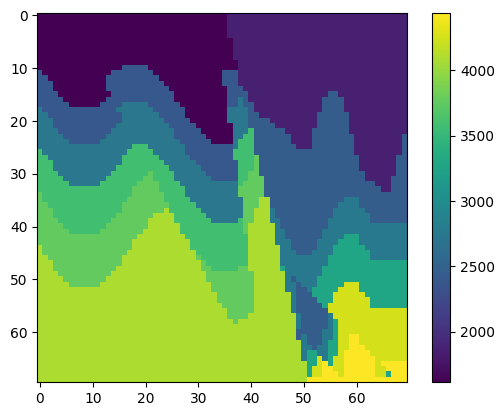

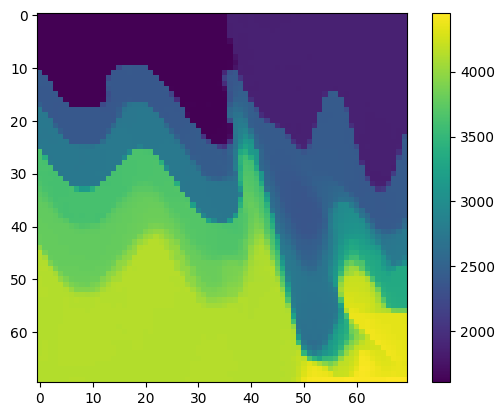

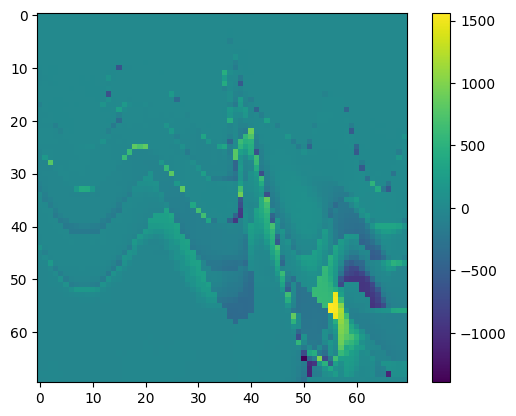

1500 CurveFault_B 34.54142857142857 6.0 60.0


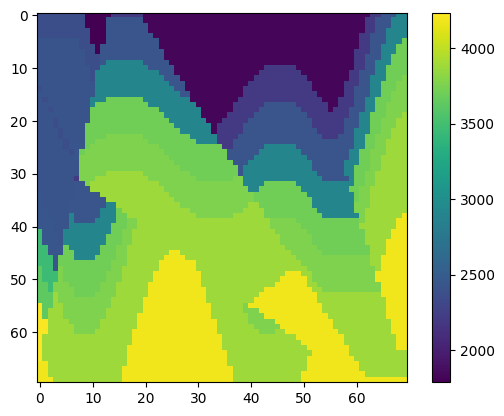

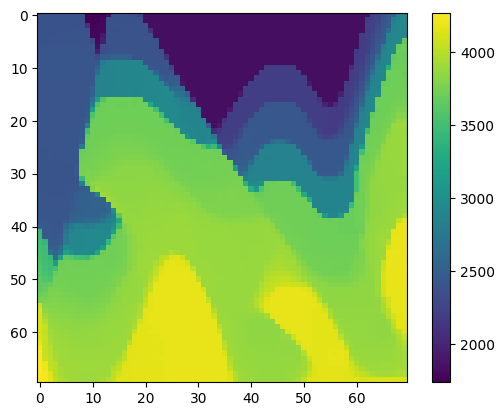

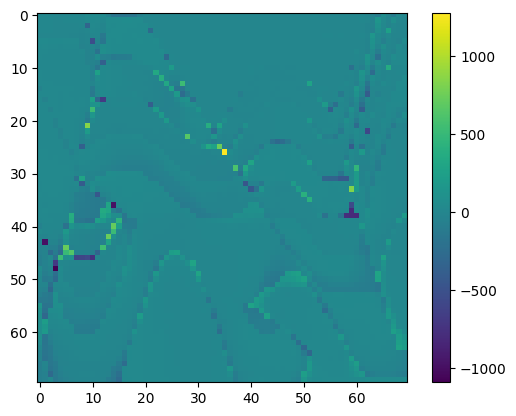

2000 CurveVel_A 9.743469387755102 1.0 30.0


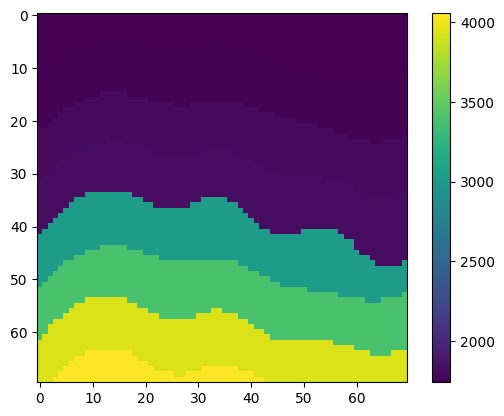

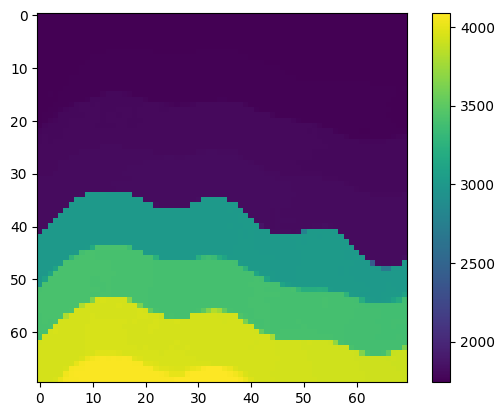

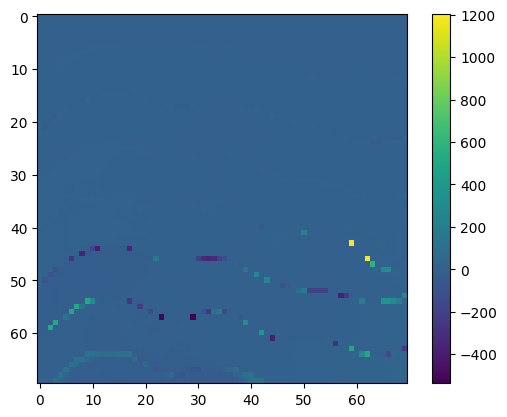

2500 CurveVel_A 7.994489795918367 -1.0 5.0


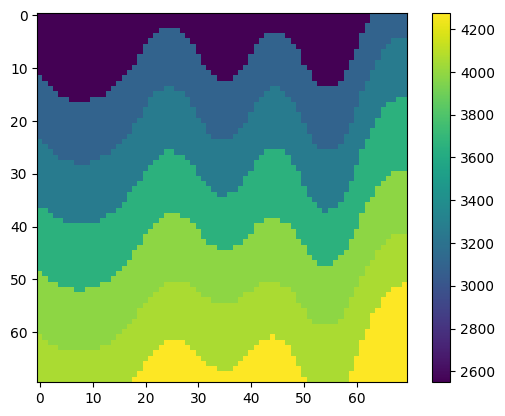

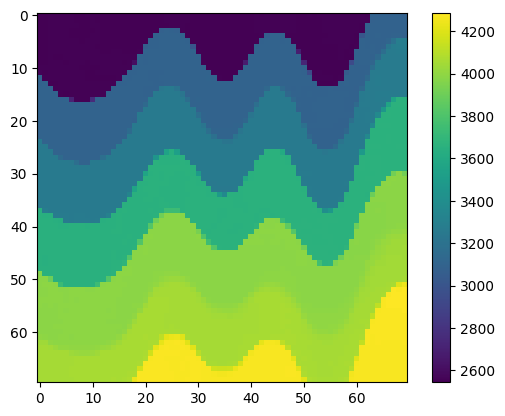

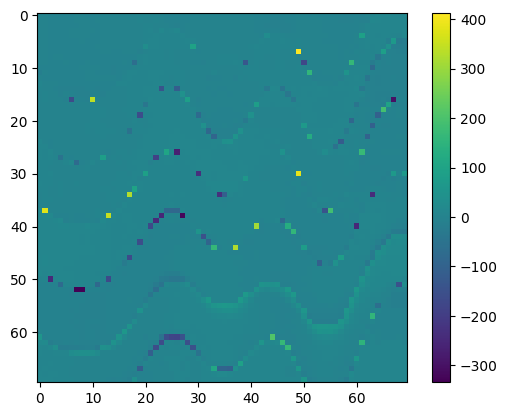

3000 CurveVel_B 53.352448979591834 1.0 21.0


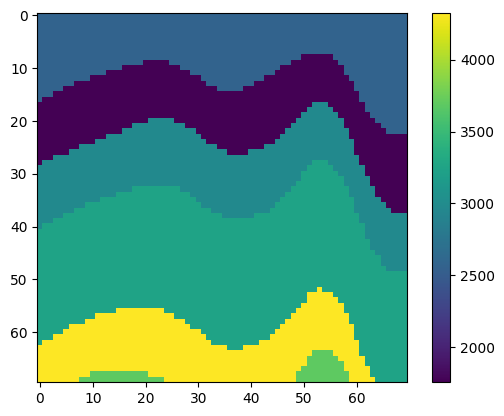

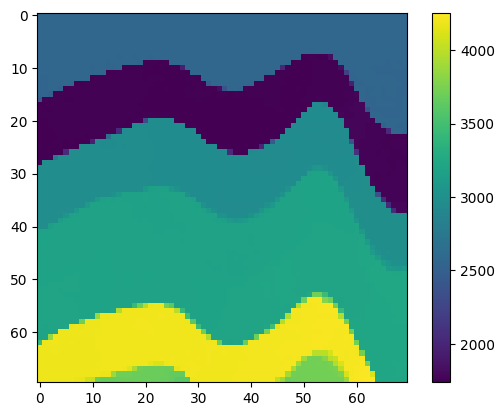

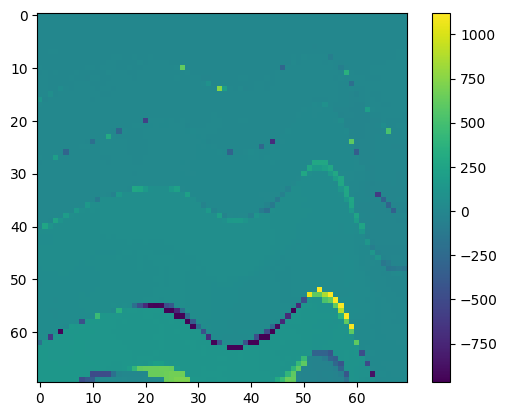

3500 CurveVel_B 9.838775510204082 0.0 38.0


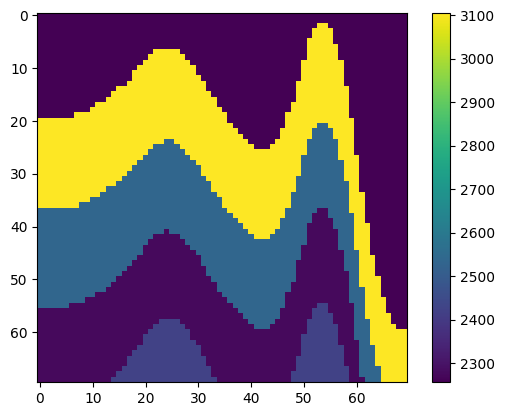

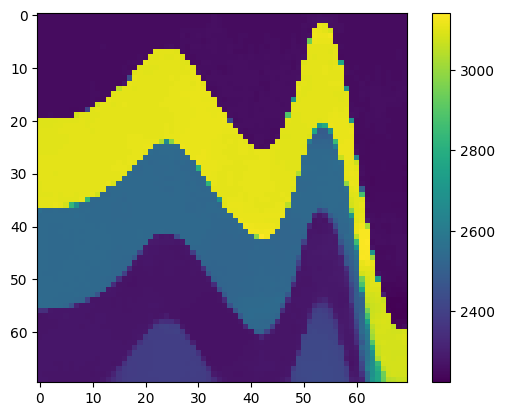

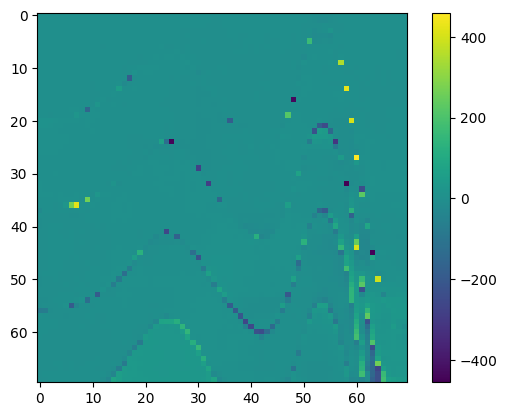

4000 FlatFault_A 2.197738111846301 1.0 0.0


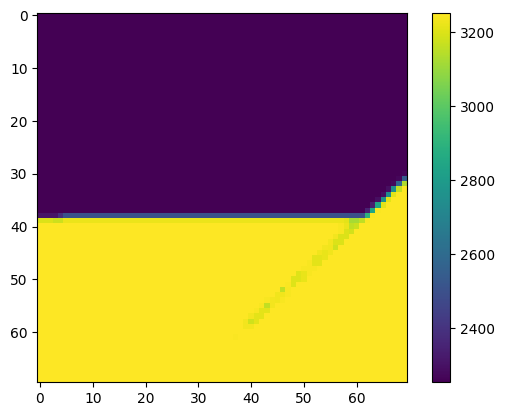

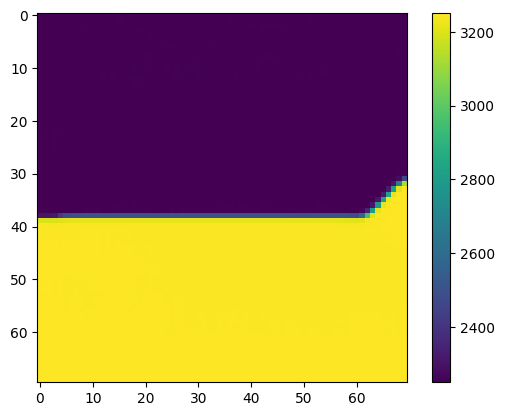

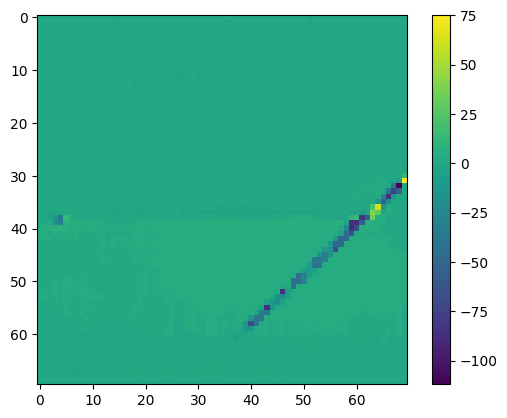

4500 FlatFault_A 3.598508848852041 1.0 -1.0


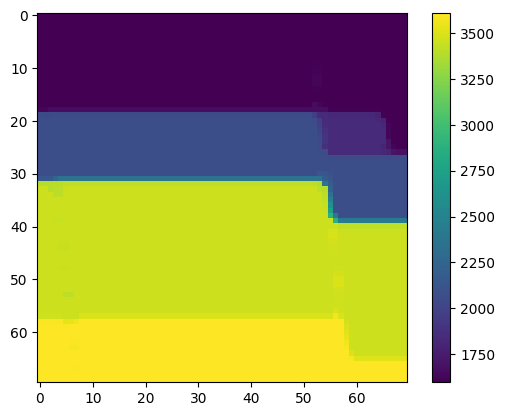

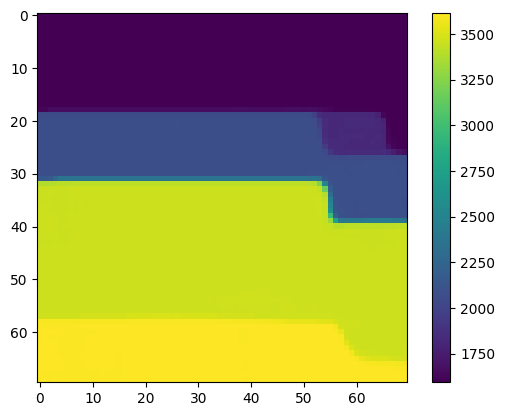

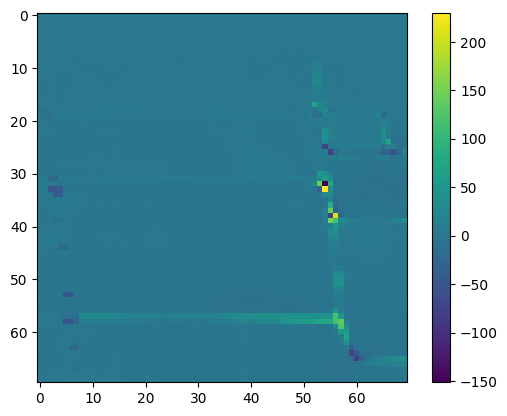

In [6]:
import cupy as cp
for i_base in range(10):
    for ii in 500*i_base+np.arange(1):
        data_out[ii].velocity.load_to_memory()
        print(ii, data_out[ii].family, cp.mean(cp.abs(data_out[ii].velocity.data-data_out[ii].velocity_guess.data)), (data_out[ii].velocity.data-data_out[ii].velocity_guess.data)[0,0], 
             (data_out[ii].velocity.data-data_out[ii].velocity_guess.data)[-1,-1])
        plt.figure();plt.imshow(cp.asnumpy(data_out[ii].velocity.data));plt.colorbar()
        plt.figure();plt.imshow(cp.asnumpy(data_out[ii].velocity_guess.data));plt.colorbar()
        plt.figure();plt.imshow(cp.asnumpy(data_out[ii].velocity.data-data_out[ii].velocity_guess.data));plt.colorbar()        
        plt.pause(0.0001)